In [165]:
import pandas as pd
from pyecharts.charts import Kline
import matplotlib.pylab as plt
import numpy as np
# 绘图显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [166]:
data = pd.read_csv('./data/Amazon.csv')

In [167]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5842 non-null   object 
 1   Open       5842 non-null   float64
 2   High       5842 non-null   float64
 3   Low        5842 non-null   float64
 4   Close      5842 non-null   float64
 5   Adj Close  5842 non-null   float64
 6   Volume     5842 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 319.6+ KB


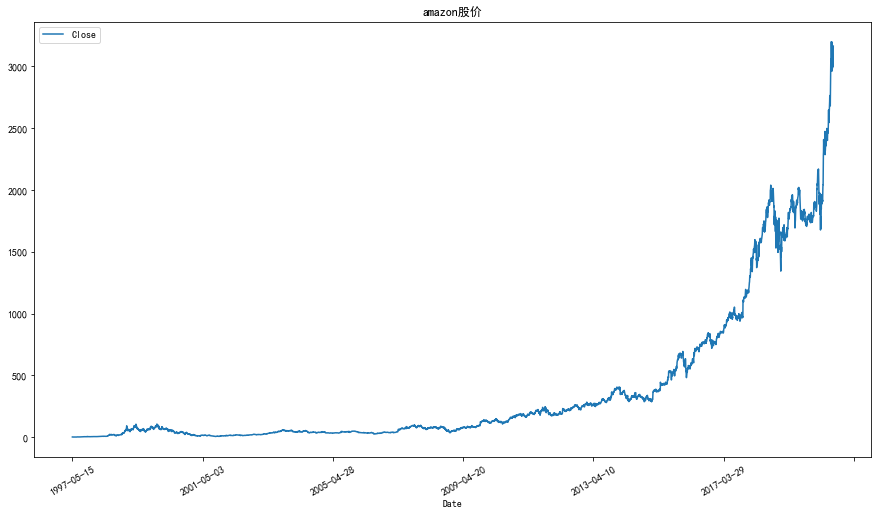

In [169]:
# 整体走势
data.plot(x='Date', y='Close', rot=30, figsize=(15, 8), title='amazon股价')

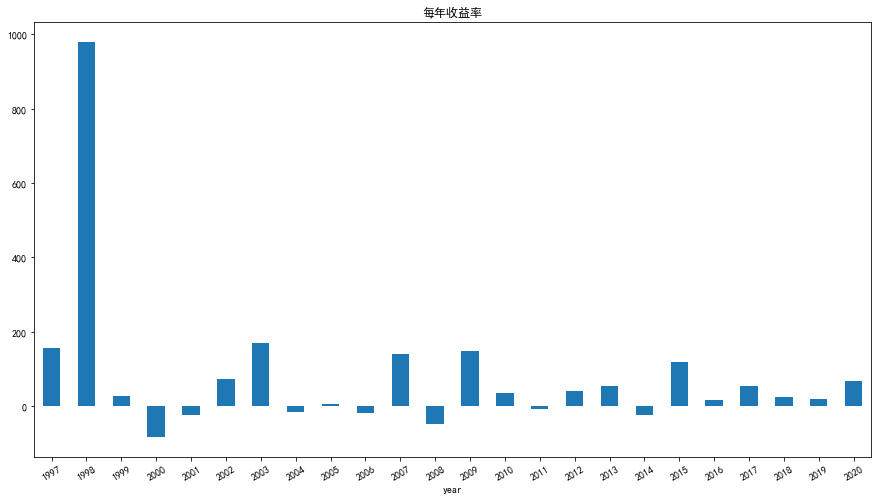

In [170]:
# 计算每年收益率
data['year'] = data['Date'].apply(lambda x: x[:4])

def get_rate_of_change(group):
    price1 = group.sort_values(by='Date')[:1]['Close']
    price2 = group.sort_values(by='Date', ascending=False)[:1]['Close']
    
    return (price2.values[0] / price1.values[0] - 1) * 100

data.groupby('year').apply(get_rate_of_change).plot(kind='bar', rot=30, figsize=(15, 8), title='每年收益率')

In [171]:
# 计算Date列与1997-05-15相差的天数，作为自变量x
from datetime import datetime

start_date = datetime(1997, 5, 15)
def get_Date_diff(date1):
    date1_arr = date1.split('-')
    cur_date = datetime(int(date1_arr[0]), int(date1_arr[1]), int(date1_arr[2]))
    
    return (cur_date - start_date).days

data['day'] = data['Date'].apply(get_Date_diff)

In [172]:
data_before_2020 = data[data['Date'] < '2020-01-01']
data_before_2020

,Date,Open,High,Low,Close,Adj Close,Volume,year,day
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1997,0
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1997,1
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1997,4
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1997,5
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1997,6
...,...,...,...,...,...,...,...,...,...
5690,2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.209961,881300,2019,8258
5691,2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.770020,6005400,2019,8260
5692,2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.800049,6186600,2019,8261
5693,2019-12-30,1874.000000,1884.000000,1840.619995,1846.890015,1846.890015,3674700,2019,8264


In [173]:
data_2020 = data[data['Date'] >= '2020-01-01']
data_2020

,Date,Open,High,Low,Close,Adj Close,Volume,year,day
5695,2020-01-02,1875.000000,1898.010010,1864.150024,1898.010010,1898.010010,4029000,2020,8267
5696,2020-01-03,1864.500000,1886.199951,1864.500000,1874.969971,1874.969971,3764400,2020,8268
5697,2020-01-06,1860.000000,1903.689941,1860.000000,1902.880005,1902.880005,4061800,2020,8271
5698,2020-01-07,1904.500000,1913.890015,1892.040039,1906.859985,1906.859985,4044900,2020,8272
5699,2020-01-08,1898.040039,1911.000000,1886.439941,1891.969971,1891.969971,3508000,2020,8273
...,...,...,...,...,...,...,...,...,...
5837,2020-07-27,3062.000000,3098.000000,3015.770020,3055.209961,3055.209961,4170500,2020,8474
5838,2020-07-28,3054.270020,3077.090088,2995.760010,3000.330078,3000.330078,3126700,2020,8475
5839,2020-07-29,3030.989990,3039.159912,2996.770020,3033.530029,3033.530029,2974100,2020,8476
5840,2020-07-30,3014.000000,3092.000000,3005.000000,3051.879883,3051.879883,6128300,2020,8477


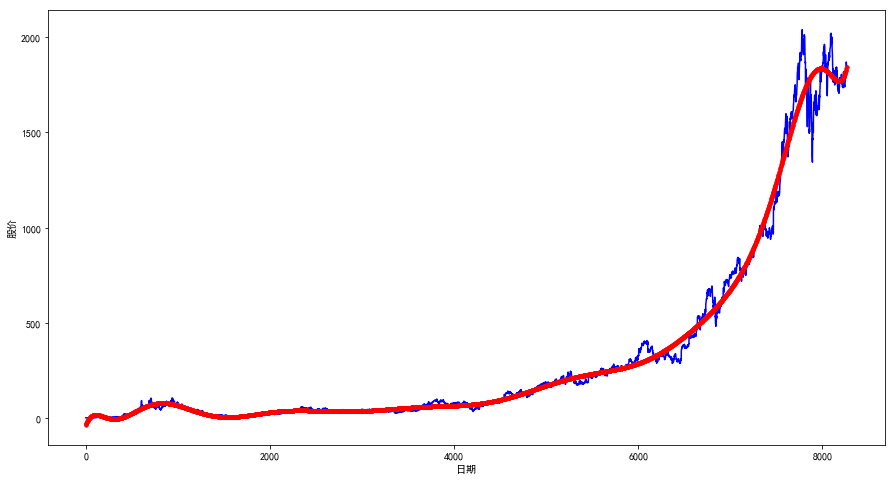

In [175]:
# 对2020年之前的股价进行多项式拟合
x = data_before_2020['day'].values
y = data_before_2020['Close'].values
reg = np.polyfit(x, y, deg=15)
y_predict = np.polyval(reg, x)

plt.figure(figsize=(15, 8))
plt.plot(x, y, 'b')
plt.plot(x, y_predict, 'r.')
plt.xlabel('日期')
plt.ylabel('股价')
plt.show()

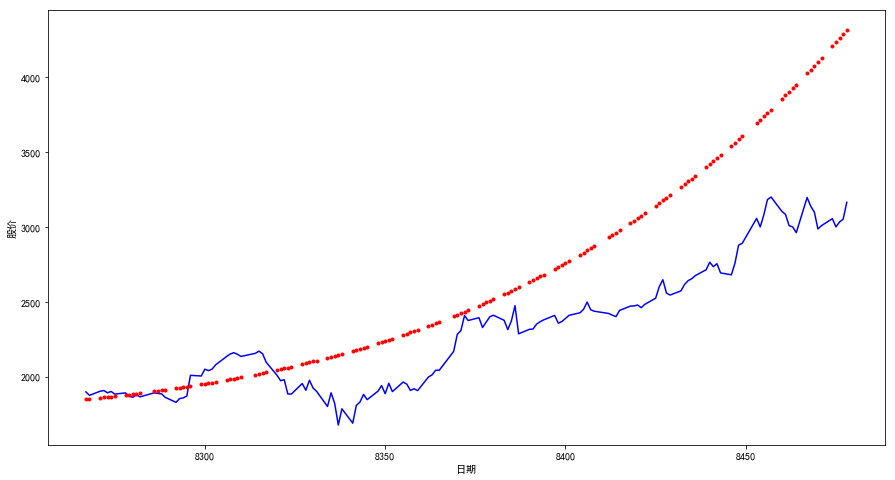

In [176]:
# 使用之前拟合的多项式预测2020年股价
x_2020 = data_2020['day'].values
y_2020 = data_2020['Close'].values
y_predict_2020 = np.polyval(reg, x_2020)

plt.figure(figsize=(15, 8))
plt.plot(x_2020, y_2020, 'b')
plt.plot(x_2020, y_predict_2020, 'r.')
plt.xlabel('日期')
plt.ylabel('股价')
plt.show()

In [177]:
np.polyval(reg, get_Date_diff('2021-07-30'))

50773.026077484436

In [184]:
# 画K线图
from pyecharts import options as opts
from pyecharts.charts import Kline, Line

def calculate_ma(day_count: int, prices):
    result: List[Union[float, str]] = []

    for i in range(len(prices)):
        if i < day_count:
            result.append("-")
            continue
        sum_total = 0.0
        for j in range(day_count):
            sum_total += float(prices[i - j][1])
        result.append(abs(float("%.2f" % (sum_total / day_count))))
    return result

x = data_2020['Date'].values.tolist()
y = data_2020[['Open', 'Close', 'Low', 'High']].values.tolist()


kline = (
    Kline()
    .add_xaxis(x)
    .add_yaxis(
        "kline",
        y,
        itemstyle_opts=opts.ItemStyleOpts(
            color="#ec0000",
            color0="#00da3c",
            border_color="#8A0000",
            border_color0="#008F28",
        ),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(is_scale=True),
        yaxis_opts=opts.AxisOpts(
            is_scale=True,
            splitarea_opts=opts.SplitAreaOpts(
                is_show=True, areastyle_opts=opts.AreaStyleOpts(opacity=1)
            ),
        ),
        datazoom_opts=[opts.DataZoomOpts(type_="inside")],
        title_opts=opts.TitleOpts(title="2020年K线图"),
    )
)

kline_line = (
    Line()
    .add_xaxis(x)
    .add_yaxis(
        series_name="MA5",
        y_axis=calculate_ma(5, y),
        is_smooth=True,
        linestyle_opts=opts.LineStyleOpts(opacity=0.5),
        label_opts=opts.LabelOpts(is_show=False),
    )
    .set_global_opts(
        xaxis_opts=opts.AxisOpts(
            type_="category",
            grid_index=1,
            axislabel_opts=opts.LabelOpts(is_show=False),
        ),
        yaxis_opts=opts.AxisOpts(
            grid_index=1,
            split_number=3,
            axisline_opts=opts.AxisLineOpts(is_on_zero=False),
            axistick_opts=opts.AxisTickOpts(is_show=False),
            splitline_opts=opts.SplitLineOpts(is_show=False),
            axislabel_opts=opts.LabelOpts(is_show=True),
        ),
    )
)
# Overlap Kline + Line
overlap_kline_line = kline.overlap(kline_line)

overlap_kline_line.render_notebook()